In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import imp

iris = datasets.load_iris()

X1 = iris.data[0:50, 0:2]
X2 = iris.data[50:100, 0:2]
X3 = iris.data[100:150, 0:2]

m1 = np.mean(X1, axis = 0)
m2 = np.mean(X2, axis = 0)
m3 = np.mean(X3, axis = 0)
C1 = np.cov(X1.T)
C2 = np.cov(X2.T)
C3 = np.cov(X3.T)

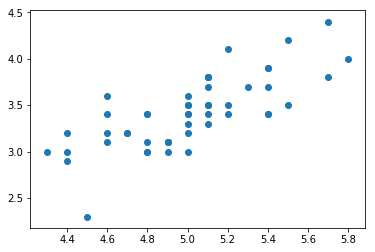

In [2]:
plt.scatter(X1[:,0], X1[:,1])

In [4]:
X1[0:8, :]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4]])

In [5]:
c1 = X1[:, 0]
mones = np.ones(50)
x = np.c_[c1, mones]
x.shape

(50, 2)

In [6]:
y = X1[:, 1]
y.shape

(50,)

In [8]:
r1 = np.matmul(x.T, y)
r2 = np.matmul(x.T, x)

In [9]:
print(r1.shape)
print(r2.shape)

(2,)
(2, 2)


In [10]:
r2inv = np.linalg.inv(r2)

In [11]:
b = np.matmul(r2inv, r1)
b

array([ 0.80723367, -0.62301173])

In [15]:
xx = np.arange(4, 6, 0.05)
xx.shape

(40,)

<function matplotlib.pyplot.show(*args, **kw)>

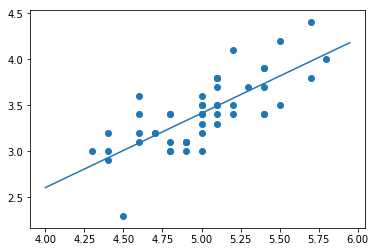

In [18]:
yy = b[0]*xx +b[1]
plt.plot(xx, yy)
plt.scatter(X1[:, 0], X1[:,1])
plt.show

In [20]:
c1 = X1[:, 0]
sqrc1 = np.square(c1)
mones = np.ones(50)
X = np.c_[sqrc1, c1, mones]
X.shape

(50, 3)

In [21]:
Y = X1[:, 1]
r1 = np.matmul(X.T, Y)
r2 = np.matmul(X.T, X)
r2inv = np.linalg.inv(r2)
b = np.matmul(r2inv, r1)
b

array([ 0.16582985, -0.85979347,  3.54623206])

<function matplotlib.pyplot.show(*args, **kw)>

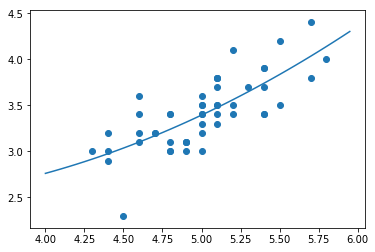

In [24]:
XX = np.arange(4, 6, 0.05)
YY = b[0]*XX*XX+b[1]*XX +b[2]
plt.plot(XX, YY)
plt.scatter(X1[:, 0], X1[:,1])
plt.show

### Regresi Multi Linier

In [25]:
x1 = iris.data[0:50, 0:3]
x1[0:8, :]

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5]])

In [26]:
x1 = iris.data[0:50, [0, 2, 1]]
x1[0:8, :]

array([[5.1, 1.4, 3.5],
       [4.9, 1.4, 3. ],
       [4.7, 1.3, 3.2],
       [4.6, 1.5, 3.1],
       [5. , 1.4, 3.6],
       [5.4, 1.7, 3.9],
       [4.6, 1.4, 3.4],
       [5. , 1.5, 3.4]])

In [30]:
c1 = x1[:,0]
c2 = x1[:,1]
mones = np.ones(50)
x = np.c_[c1, c2, mones]
y = x1[:, 2]
r1 = np.matmul(x.T, y)
r2 = np.matmul(x.T, x)
r2inv = np.linalg.inv(r2)
b = np.matmul(r2inv, r1)
b

array([ 0.8134761 , -0.04805918, -0.58390272])

In [31]:
xx = np.arange(4, 6, 0.05)
xx1 = np.arange(4, 6, 0.05)
xx2 = np.arange(4, 6, 0.05)
Gx1, Gx2 = np.meshgrid(xx1, xx2)
Gx1.shape

(40, 40)

In [32]:
yy = b[0]*Gx1.ravel() + b[1]*Gx2.ravel() + b[2]
yy.shape

(1600,)

<function matplotlib.pyplot.show(*args, **kw)>

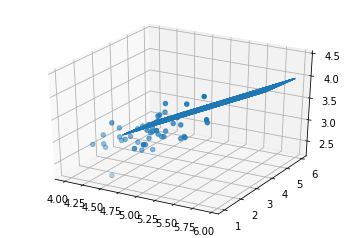

In [33]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(Gx1.ravel(), Gx2.ravel(), yy)
ax.scatter(x1[:, 0], x1[:, 1], x1[:, 2])
plt.show

### Square Error (SE)
Meminimalkan square error. tujuan linear regresi untuk meminimalkan SE. penalty a(alpha)*(c1^2 + c2^2 + c3^3)

### Klasifikasi

In [34]:
iris.data[45:55, :]

array([[4.8, 3. , 1.4, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5]])

In [35]:
iris.target[44:55]

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [36]:
# Fungsi Logistik 
from sklearn.linear_model import LogisticRegression

In [37]:
X1 = iris.data[0:100, 0:2]
m1 = np.mean(X1, axis=0)
m1

array([5.471, 3.094])

In [40]:
c1 = X1[:, 0] - m1[0]
c2 = X1[:, 1] - m1[0]
y = iris.target[0:100]
x = np.c_[c1, c2]

In [42]:
logreg = LogisticRegression(C=1e5, solver='lbfgs')
logreg.fit(x, y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [43]:
logreg.predict([[5.0, 0.2]])

array([1])

In [44]:
logreg.predict([[3.0, 7.0]])

array([0])